In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline


In [4]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

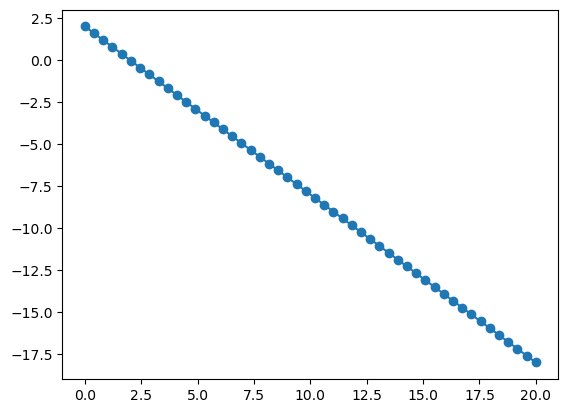

In [6]:
plt.plot(X,y,marker='o')

In [7]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [8]:
X2= data2[:,0:3]
y2=data2[:,-1].reshape(-1,1)
X2.shape,y2.shape

((25, 3), (25, 1))

In [10]:
# create 4 thetas because i have 4 features so need 4 thetas 
thetas=np.zeros((4,1))
thetas

array([[0.],
       [0.],
       [0.],
       [0.]])

### RMS_stocatic_multivarible

In [38]:
def Rms_mv_batch(X,y,learining_rate=0.0001,beta=0.9,epsloin=1e-08,n_iteration=1000): 
    m=len(X)
    theta_vector = np.zeros((X.shape[1], 1)) #shape (n,1)
    V_theda = np.zeros((X.shape[1], 1)) #shape (n,1)
    all_theta=[]
    hypothesis_history=[]
    all_loss=[]
    for i in range(n_iteration): # loop for epocis 
        #step 2 : h0(x)
        y_hat=X@theta_vector
        hypothesis_history.append(y_hat)
        print(f"****************** Iteration {i} ********************\n ")
        print(f"\n h(x):{y_hat}")
        
        
         #step3 mean square error #mse=loss(j)=error
        error_vector=y_hat-y
        loss = np.sum(error_vector**2) / (2 * m)
        #to store all error 
        all_loss.append(loss)
        print('error_vector:\n', error_vector, "\n")
        print('loss =', loss, "\n")
        
       # to store all theta for plot
        all_theta.append(theta_vector.flatten().tolist())
         
        #step 4    
        gradient_vector=(X.T@error_vector).reshape(-1,1)
        
        
        # Stopping using gradient
        gradient_norm = np.linalg.norm(gradient_vector)
        print(f"\n Gradient Vector Norm: {gradient_norm}")
        if gradient_norm < 0.001:
            break
        # Stopping using loss
        if (i > 0) and abs(all_loss[i-1] - all_loss[i]) < 0.001:
            break
            
        #updating 
        print(f"V_theda{i} : ", V_theda, "\n")
        V_theda=beta * V_theda + (1-beta) * (gradient_vector**2)
        print(f"V_theda_updated{i} : ", V_theda, "\n")

       #update_theta
        theta_vector=theta_vector - (learining_rate /(np.sqrt(V_theda) + epsloin)) * gradient_vector
        print("theta_ New :", theta_vector , "\n")
    all_theta=np.array(all_theta)
    return theta_vector,all_loss,hypothesis_history,all_theta

In [39]:
 
theta_vector,all_loss,hypothesis_history,all_theta =Rms_mv_batch(X2,y2, learining_rate=0.0001, beta=0.9, epsloin=1e-05, n_iteration=1)


****************** Iteration 0 ********************
 

 h(x):[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
error_vector:
 [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]] 

loss = 13405.98 


 Gradient Vector Norm: 572938.6497304925
V_theda0 :  [[0.]
 [0.]
 [0.]
 [0.]] 

V_theda_updated0 :  [[1.64106010e+06]
 [1.06860341e+10]
 [1.08030542e+10]
 [1.13351402e+10]] 

theta_ New : [[0.00031623]
 [0.00031623]
 [0.00031623]
 [0.00031623]] 

